# Evidencias clase 4 (04/05 y 11/05)
# Aproximaciones de Chevyshev y Bessel
<img src="logo_UTN.svg" title="Asi es como se añade una imagen en Markdown" align="right" width="150"> 

## Teoría de Circuitos II
### Alumno: Federico Albero
### Curso: R4001

**Aclaración 1:** A modo de evidenciar el progreso en la materia, estaré subiendo los apuntes de mi carpeta clase a clase. Las evidencias las estaré agrupando según el número de clase correspondiente a la planifiación de la materia que está en el campus, en función de los temas y contenidos que esta abarque.

**Aclaración 2:** *Por lo general,* los apuntes de clase (presencial, sincrónica) los tomo en lapiz, ya que luego de clase realizo una segunda lectura de los mismos y al realizar nuevas anotaciones, estas las realizo en tinta para poder diferenciarlas. También al momento de realizar la segunda lectura de los temas, suelo anexar algunas notas tipo "posticks" con aclaraciones o información adicional sobre algún tema en partiular que ayude a comprender mejor el tema en cuestión.

#### Videos vistos para esta clase:
<img src="evidencia_videos.png" title="Videos playlist clase 4 YouTube" width="300"> 

#### Contenido de la carpeta en la clase 4:
* Desarrollo de la función de aproximación y de los polinomios de Chebyshev.
* Ejemplos de filtros pasa bajo Chebyshev de ordenes 1, 2 y 3. Comparación.
* Lugar de singularidades de un filtro Chebyshev.
* Plantilla de diseño de un filtro Chebyshev + ejercicio.
* Anotaciones clase presencial (04/05) y resolución ejercicio N°3 de la guía (Cheby).
* Polinomios de Bessel de orden "n" y función transferencia.
* Lugar de singularidades de $H_{BN(S)}$
* Comparativa entre topologías Bessel y Butterworth de igual orden.
* Diseño de un filtro Bessel mediante plantilla y lectura de los ábacos de diseño.
* Anotaciones clase presencial (11/05) y resolución ejercicio N°6 de la guía (Bessel).


In [1]:
from IPython.display import IFrame
IFrame("./Evidencias_carpeta_clase4.pdf", width=1000, height=1000)

#### Scripts de Python utilizados para corroborar el ejercicio de topología Chebychev planteado en uno de los videos de la clase:

Principalmente utilicé estos scripts para poder verificar los valores de los coeficientes obtenidos a través de diferentes caminos inspeccionando las variables en la consola del Spyder. Se verifica que lo calculado analíticamente en papel es equivalente a lo arrojado por las funciones de alto nivel de Python tales como cheb1ap() y zpk2tf().

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 17 18:01:07 2023

@author: fede23
"""

#%% Ejercicio Chebychev - Clase 4 %%#

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
# import matplotlib as mpl

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

alpha_max = 1

ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon

raices = np.roots([1, 0, 48*ee, -128*ee])

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 17 18:08:07 2023

@author: fede23
"""

#%% Ejercicio Chebychev - Clase 4 %%#

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
# import matplotlib as mpl

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# Datos
alpha_max = 1
ws = 10

ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon

for nn in range(1,5):
    
    alpha_min = 10*np.log10( 1 + ee* np.cosh(nn * np.arccosh(ws))**2 )
    
    print( 'nn {:d} - alpha_min {:f}'.format(nn, alpha_min)) # me quedo con n=3

nn = 3 # luego de iterar

z, p, k = sig.cheb1ap(nn, alpha_max)
num, den = sig.zpk2tf(z, p, k) 
# recordar que siempre estas funciones devuelven num y denum en formato mónico, con el coeficiente de mayor orden en 1
# si lo quiero llevar al formato de partes de funciones, multiplico cada valor de "den" por el coeficiente a^(-1)

#%% Verificación por parte de funciones %%#

a = 4*e
d = 1

raices_b = np.roots([1, 0, 48*ee, -128*ee])
b = raices_b[-1]
c = np.sqrt( 9*ee + 2*b*d )

num_2 = 1
den_2 = [a, b.real, c.real, d]

#%% Comparo resultados %%#
den_1=[]

num_1 = num_2*(a**(-1))
for i in range(len(den_2)):
    den_1.append(den_2[i]*(a**(-1)) )


nn 1 - alpha_min 14.296318
nn 2 - alpha_min 40.109232
nn 3 - alpha_min 66.107558
nn 4 - alpha_min 92.106360


#### Script utilizado para corroborar el ejercicio N°3 de la guía (Cheby) realizado en clase:

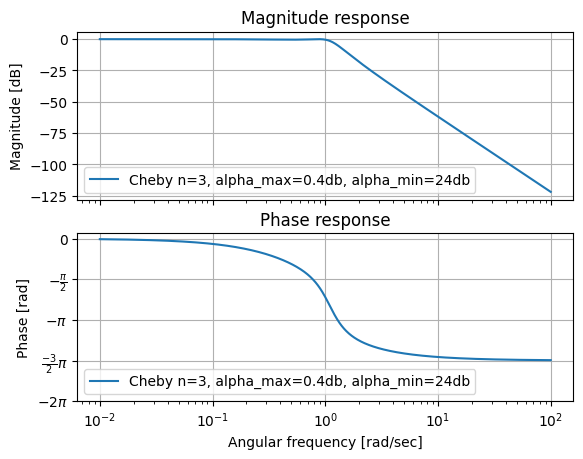

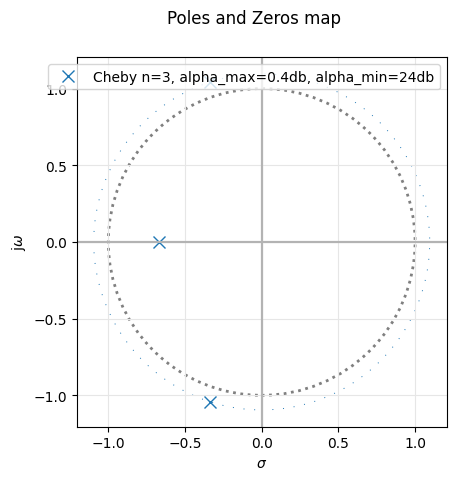

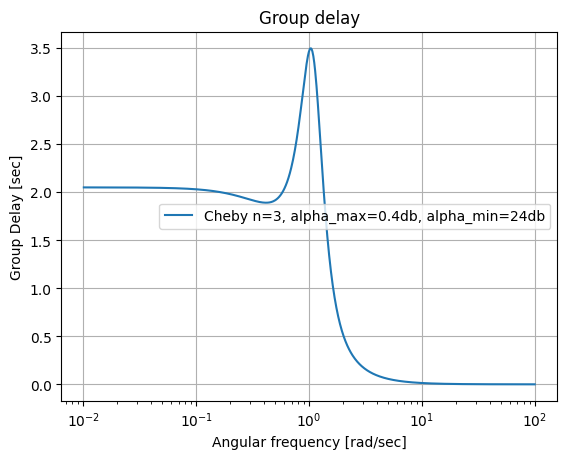

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May 20 15:41:13 2023

@author: fede23
"""

#%% Ejercicio Chebychev - Clase 4 (PRESENCIAL) %%#

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
# import matplotlib as mpl

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import pzmap, bodePlot, GroupDelay
# Datos
n = 3
alpha_max = 0.4
alpha_min = 24

ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon

#%% Verificación por parte de funciones %%#

a = 4*e
d = 1

raices = np.roots([1, 0, 48*ee, -128*ee])
raices2 = raices[~np.iscomplex(raices)]
b = float(raices2.real) # lo convierto en un float

c = np.sqrt( 9*ee + 2*b*d )

num_2 = 1
den_2 = [a, b.real, c.real, d] # armo un array con los coeficientes

#%% Llevo los coeficientes obtenidos a la forma mónica %%#
den_1=[]

num_1 = num_2*(a**(-1))
for i in range(len(den_2)):
    den_1.append(den_2[i]*(a**(-1)) )
    
#%% Chequeo mediante las funciones de cheby de alto nivel %%#

z, p, k = sig.cheb1ap(n, alpha_max)
num, den = sig.zpk2tf(z, p, k) 

#%% Grafico %%#

tf = sig.TransferFunction( num, den )

# Grafico la función transferencia
bodePlot(tf, fig_id=1, filter_description = 'Cheby n=3, alpha_max=0.4db, alpha_min=24db')
pzmap(tf, fig_id=2, filter_description = 'Cheby n=3, alpha_max=0.4db, alpha_min=24db')
GroupDelay(tf, fig_id=3, filter_description = 'Cheby n=3, alpha_max=0.4db, alpha_min=24db')

#%% Pruebo despejando C en lugar de B %%#

raices_c = np.roots([1, 0, -18*ee, -32*e, (81*(e)**4 + 96*ee)])


#### Script utilizado para corroborar el ejercicio N°6 de la guía (Bessel) realizado en clase:

Coeficientes numerador: [105.]
Coeficientes denominador:  [  1.  10.  45. 105. 105.]


(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

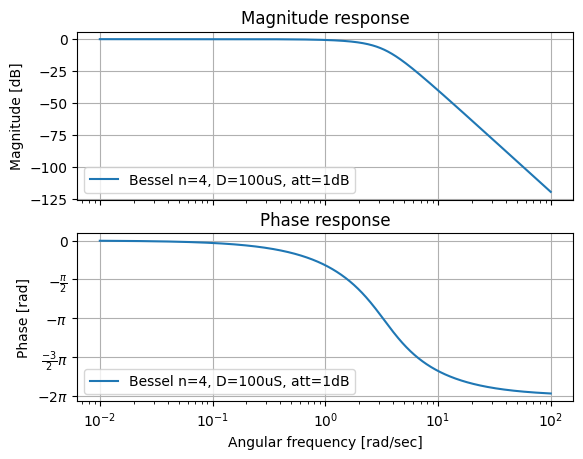

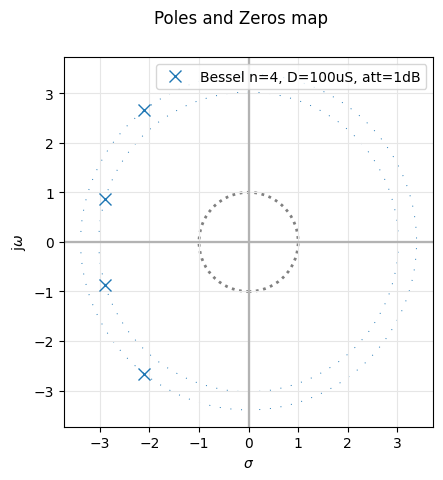

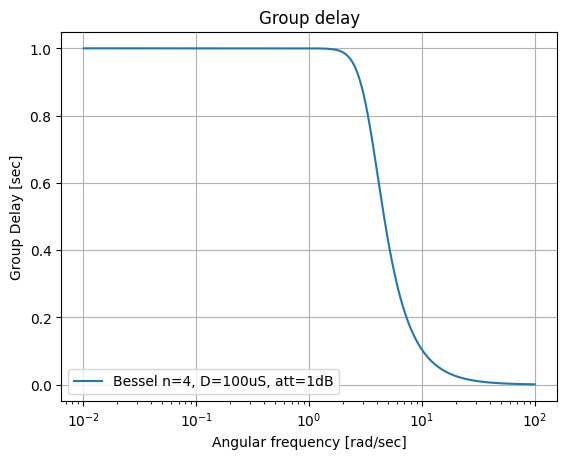

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 22 22:26:04 2023

@author: fede23
"""

#%% Ejercicio Bessel - Clase 4 (PRESENCIAL) %%#

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
# import matplotlib as mpl

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import pzmap, bodePlot, GroupDelay

#%% Desarrollo %%#

# Datos
n = 4

z,p,k = sig.besselap(4, norm="delay")
num, den = sig.zpk2tf(z,p,k)

print('Coeficientes numerador:', num)
print('Coeficientes denominador: ', den)

# Analíticamente, se obtuvo la siguiente función transferencia:
# Hb4(s) = (105) / (s⁴ + 10s³ + 45s² + 105s + 105)

#%% Grafico %%#

tf = sig.TransferFunction( num, den )

# Grafico la función transferencia
bodePlot(tf, fig_id=1, filter_description = 'Bessel n=4, D=100uS, att=1dB')
pzmap(tf, fig_id=2, filter_description = 'Bessel n=4, D=100uS, att=1dB')
GroupDelay(tf, fig_id=3, filter_description = 'Bessel n=4, D=100uS, att=1dB')

